<a href="https://colab.research.google.com/github/rb4050/Machine-learning-/blob/main/Time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time series decomposition


In [ ]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/AirPassengers.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/AirPassengers.csv


In [ ]:
import pandas as pd
df = pd.read_csv(url, parse_dates=["Month"])
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
df.dtypes


,0
Month,datetime64[ns]
Passengers,int64


## Visulaize the actual data



In [ ]:
df2 = df.copy()
df2 = df2.set_index("Month")
df2.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


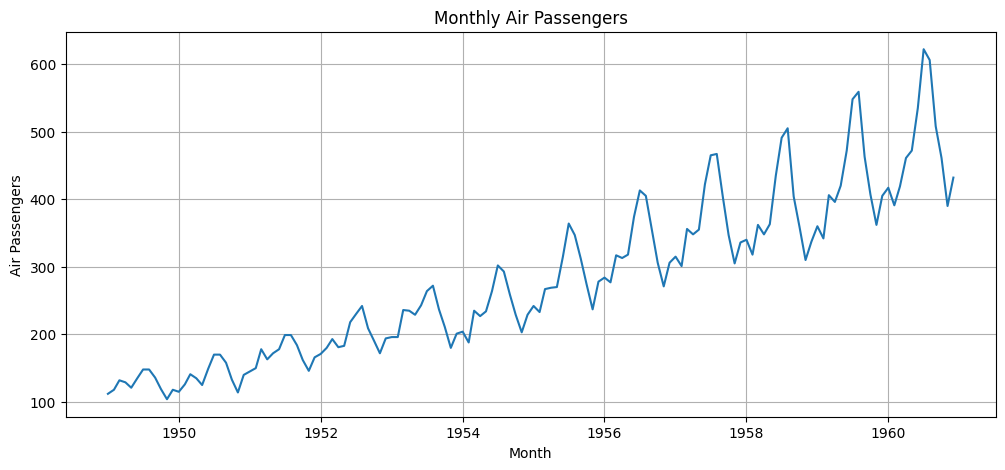

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(df2["Passengers"])
plt.xlabel("Month")
plt.ylabel("Air Passengers")
plt.title("Monthly Air Passengers")
plt.grid()
plt.show()

## Multiplicative decomposition is more suitable to this


## Apply decomposition


In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [7]:
q = seasonal_decompose(df2["Passengers"], model="mul")


In [8]:
q.observed


,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [9]:
q.trend.head(10)


,trend
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,126.791667
1949-08-01,127.250000
1949-09-01,127.958333


In [10]:
q.seasonal


,seasonal
Month,
1949-01-01,0.910230
1949-02-01,0.883625
1949-03-01,1.007366
1949-04-01,0.975906
1949-05-01,0.981378
...,...
1960-08-01,1.219911
1960-09-01,1.060492
1960-10-01,0.921757


In [11]:
q.resid.head(10)


,resid
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.951664
1949-08-01,0.953401
1949-09-01,1.002220


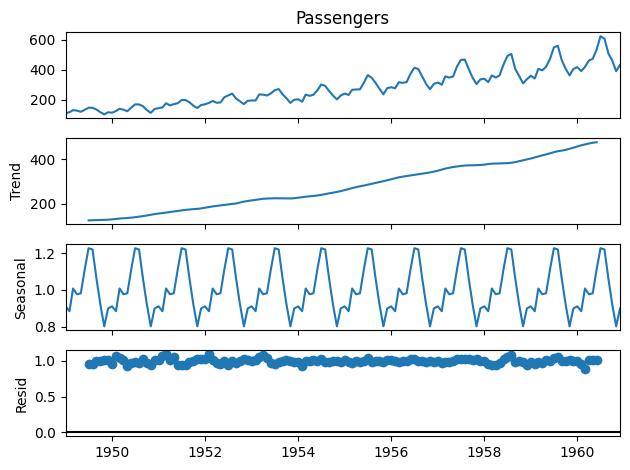

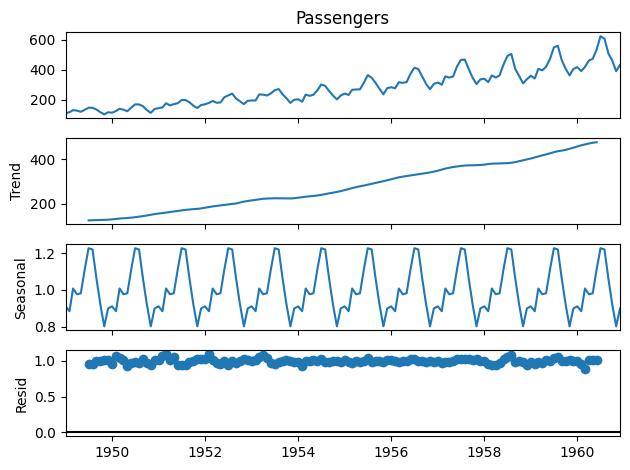

In [12]:
q.plot()


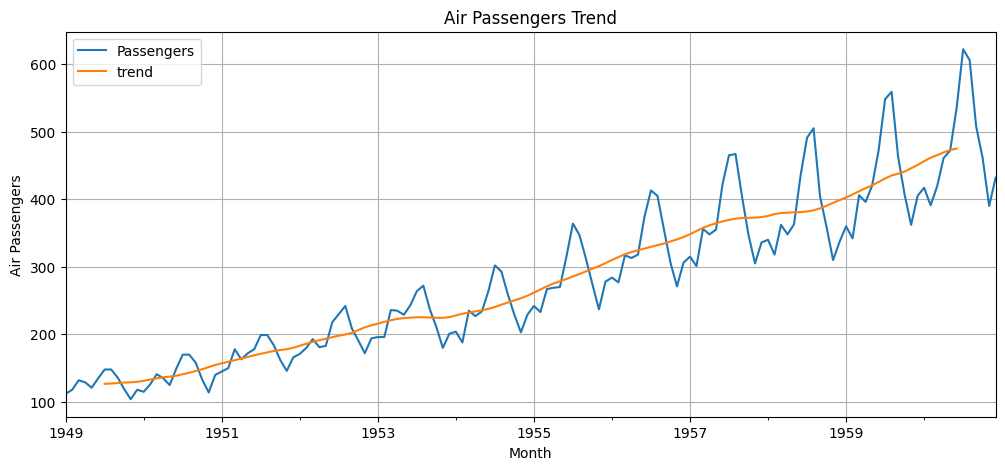

In [13]:
plt.figure(figsize=(12, 5))
q.observed.plot()
q.trend.plot()
plt.xlabel("Month")
plt.ylabel("Air Passengers")
plt.title("Air Passengers Trend")
plt.grid()
plt.legend()
plt.show()

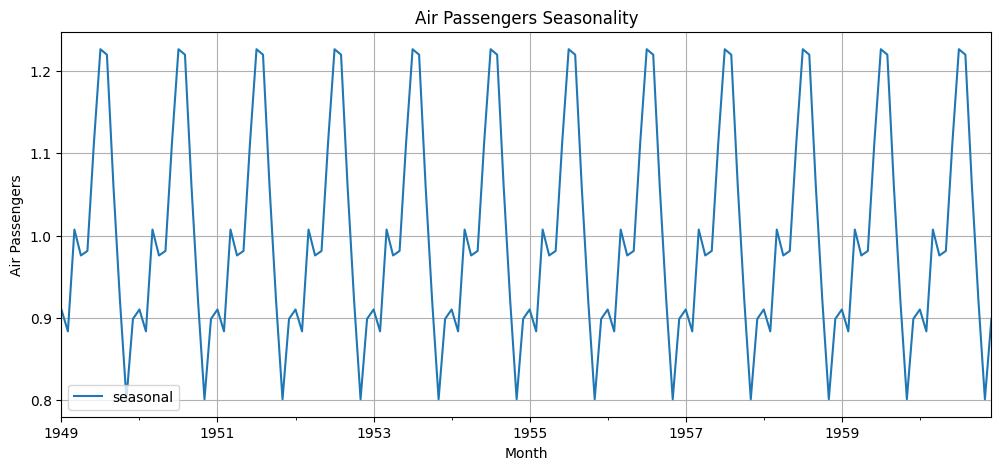

In [14]:
plt.figure(figsize=(12, 5))
q.seasonal.plot()
plt.xlabel("Month")
plt.ylabel("Air Passengers")
plt.title("Air Passengers Seasonality")
plt.grid()
plt.legend()
plt.show()

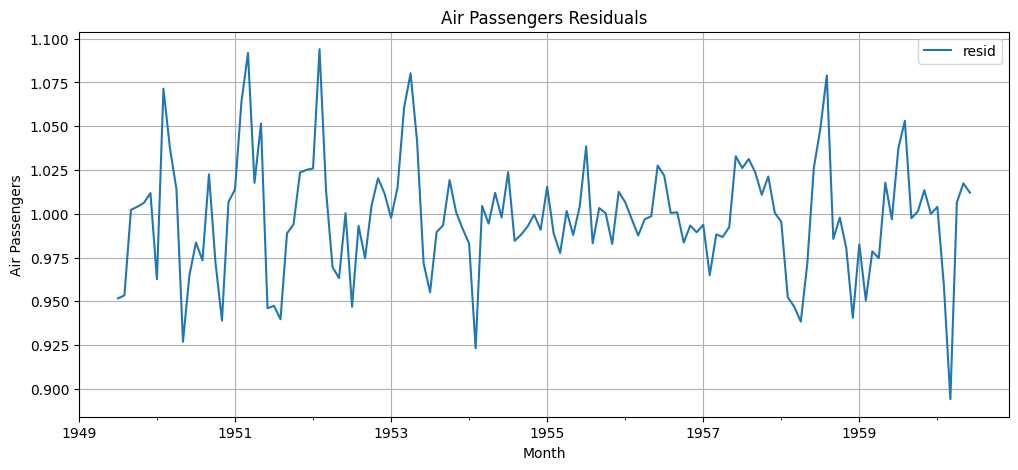

In [15]:
plt.figure(figsize=(12, 5))
q.resid.plot()
plt.xlabel("Month")
plt.ylabel("Air Passengers")
plt.title("Air Passengers Residuals")
plt.grid()
plt.legend()
plt.show()

## Time series forecasting


### statsforecast

In [16]:
%pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 10.2 MB/s eta 0:00:00


In [18]:
df

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [22]:
df = df.rename(columns={"Month": "ds", "Passengers": "y"})      # date time in ds and target in y == always needed this format
df.head()

,ds,y,unique_id
0,1949-01-01,112,air_passenger
1,1949-02-01,118,air_passenger
2,1949-03-01,132,air_passenger
3,1949-04-01,129,air_passenger
4,1949-05-01,121,air_passenger


In [23]:
df["unique_id"] = "air_passenger"

In [24]:
df.head()

,ds,y,unique_id
0,1949-01-01,112,air_passenger
1,1949-02-01,118,air_passenger
2,1949-03-01,132,air_passenger
3,1949-04-01,129,air_passenger
4,1949-05-01,121,air_passenger


In [25]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

In [27]:
sf = StatsForecast(
    models = [AutoARIMA(season_length=12)],
    freq = "MS",       # ms = month start
    n_jobs = -1
)

In [28]:
sf.fit(df)

StatsForecast(models=[AutoARIMA])

In [29]:
sf

StatsForecast(models=[AutoARIMA])

## ESTIMATE THE VALUES FOR NEXT 3 YEARS

In [33]:
n_years = 3
n_months = n_years * 12
ypred = sf.predict(h=n_months,level=[95])
ypred = ypred.round(0)
ypred

,unique_id,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95
0,air_passenger,1961-01-01,444.0,421.0,467.0
1,air_passenger,1961-02-01,418.0,390.0,446.0
2,air_passenger,1961-03-01,446.0,413.0,480.0
3,air_passenger,1961-04-01,488.0,451.0,526.0
4,air_passenger,1961-05-01,499.0,458.0,541.0
5,air_passenger,1961-06-01,562.0,517.0,607.0
6,air_passenger,1961-07-01,649.0,601.0,698.0
7,air_passenger,1961-08-01,633.0,582.0,685.0
8,air_passenger,1961-09-01,535.0,481.0,590.0
9,air_passenger,1961-10-01,488.0,431.0,545.0


In [32]:
df

,ds,y,unique_id
0,1949-01-01,112,air_passenger
1,1949-02-01,118,air_passenger
2,1949-03-01,132,air_passenger
3,1949-04-01,129,air_passenger
4,1949-05-01,121,air_passenger
...,...,...,...
139,1960-08-01,606,air_passenger
140,1960-09-01,508,air_passenger
141,1960-10-01,461,air_passenger
142,1960-11-01,390,air_passenger


In [34]:
ypred.to_csv("Results.csv",index=False)

# visualize

In [36]:
historical_data = df[["ds","y"]].set_index("ds")
historical_data

,y
ds,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [42]:
forecast_data = ypred[["ds","AutoARIMA"]].set_index("ds")
forecast_data

,AutoARIMA
ds,
1961-01-01,444.0
1961-02-01,418.0
1961-03-01,446.0
1961-04-01,488.0
1961-05-01,499.0
1961-06-01,562.0
1961-07-01,649.0
1961-08-01,633.0
1961-09-01,535.0


# Plotting

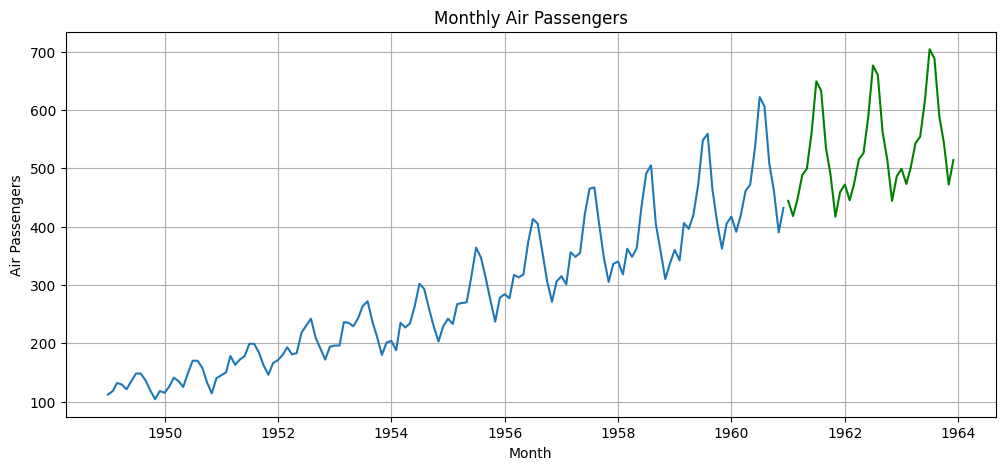

In [43]:
plt.figure(figsize=(12, 5))
plt.plot(historical_data["y"], label="Historical Data")
plt.plot(forecast_data, label="Forecasted Data",color="green")
plt.xlabel("Month")
plt.ylabel("Air Passengers")
plt.title("Monthly Air Passengers")
plt.grid()

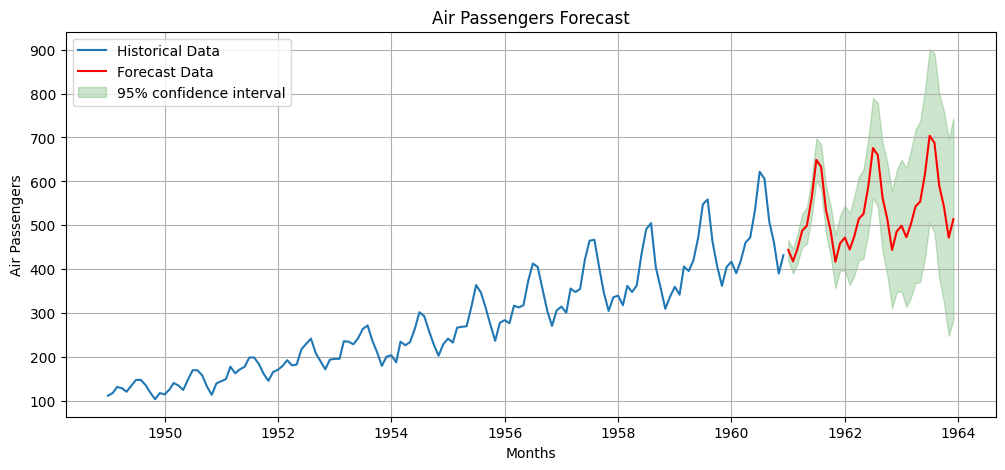

In [46]:
plt.figure(figsize=(12, 5))
plt.plot(historical_data["y"], label="Historical Data")
plt.plot(forecast_data["AutoARIMA"], label="Forecast Data", color="red")
plt.fill_between(
    forecast_data.index,
    ypred["AutoARIMA-lo-95"],
    ypred["AutoARIMA-hi-95"],
    color = "green",
    alpha=0.2,
    label = "95% confidence interval"
)
plt.xlabel("Months")
plt.ylabel("Air Passengers")
plt.title("Air Passengers Forecast")
plt.grid()
plt.legend()
plt.show()

In [47]:
%pip install joblib


In [48]:
import joblib
joblib.dump(sf, "arima.joblib")

['arima.joblib']